In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 132kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

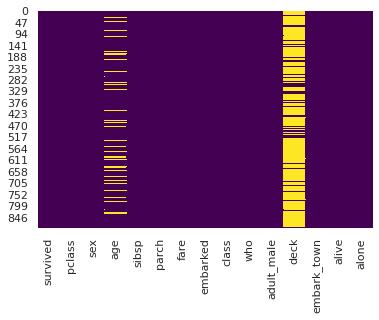

In [7]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

In [8]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

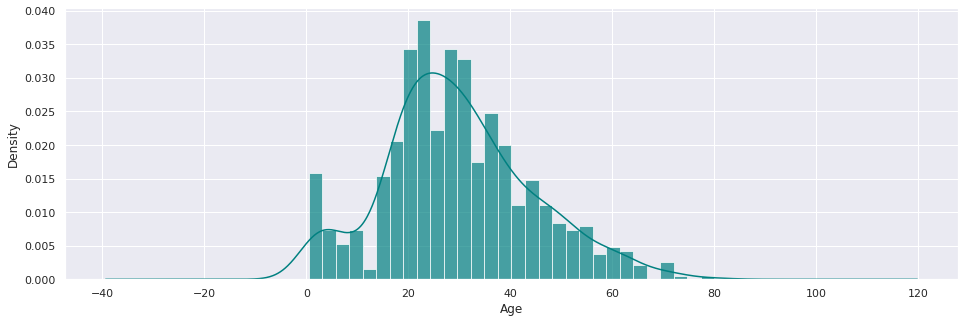

In [9]:
ax=titanic['age'].hist(bins=30, density=True, stacked=True, color='teal', alpha=0.7, figsize=(16,5))
titanic['age'].plot(kind='density',color='teal')
ax.set_xlabel('Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Male')

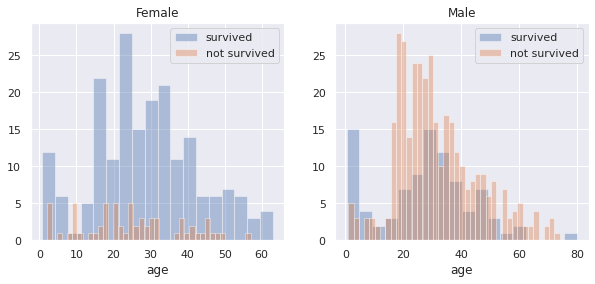

In [10]:
survived='survived'
not_survived='not survived'

fig,axes=plt.subplots(nrows=1, ncols=2,figsize=(10,4))

women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']

ax=sns.distplot(women[women[survived]==1].age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax=sns.distplot(women[women[survived]==0].age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax=sns.distplot(men[men[survived]==1].age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax=sns.distplot(men[men[survived]==0].age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')

In [11]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

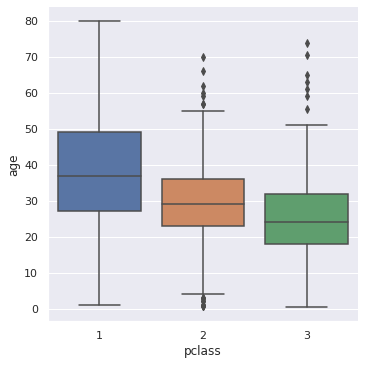

In [12]:
sns.catplot(x='pclass', y='age', data=titanic, kind='box')

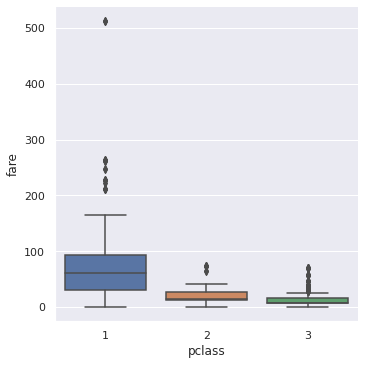

In [13]:
sns.catplot(x='pclass', y='fare', data=titanic, kind='box')

In [14]:
titanic[titanic['pclass']==1]['age'].mean()

38.233440860215055

In [15]:
titanic[titanic['pclass']==2]['age'].mean()

29.87763005780347

In [16]:
titanic[titanic['pclass']==3]['age'].mean()

25.14061971830986

In [17]:
# filling the age values by the mean of their respective passenger class
def inpute_age(cols):
  age=cols[0]
  pclass=cols[1]

  if pd.isnull(age):
    return titanic[titanic['pclass']==pclass]['age'].mean()
  else:
    return age

In [18]:
titanic['age']=titanic[['age','pclass']].apply(inpute_age, axis=1)

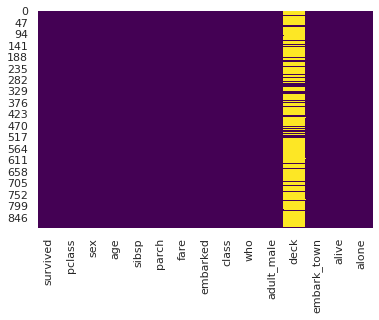

In [19]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

# Analysing Embarked

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


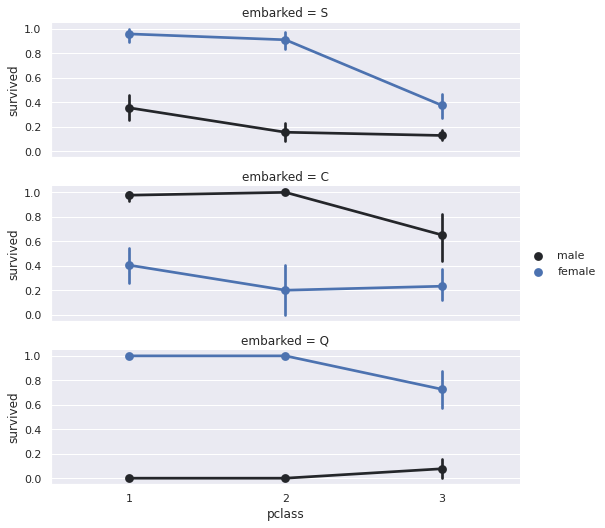

In [20]:
f=sns.FacetGrid(titanic, row='embarked', height=2.5, aspect=3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex')
f.add_legend()

In [21]:
titanic['embarked'].isnull().sum()

2

In [22]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [23]:
common_value='S'
titanic['embarked'].fillna(common_value, inplace=True)

In [24]:
titanic['embarked'].isnull().sum()

0

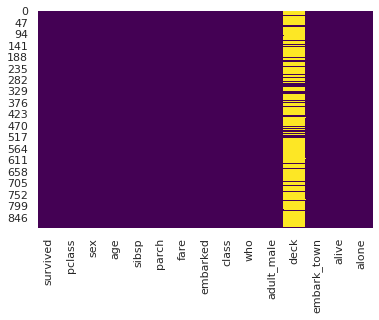

In [25]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

In [26]:
titanic.drop(labels=['deck', 'embark_town', 'alive'], inplace=True, axis=1)

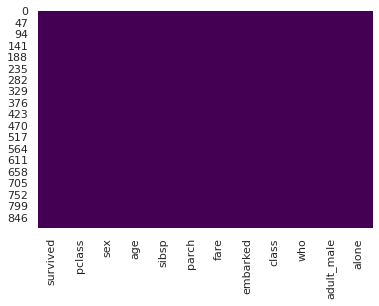

In [27]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

# Feature Transformantion

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [29]:
titanic['fare']=titanic['fare'].astype('int')
titanic['age']=titanic['age'].astype('int')
titanic['pclass']=titanic['pclass'].astype('int')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    int64   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int64   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int64(6), object(3)
memory usage: 65.5+ KB


## Concert Categorical data into numerical data

In [30]:
genders={'male':0, 'female':1}
titanic['sex']=titanic['sex'].map(genders)

In [31]:
who={'man':0, 'woman':1, 'child':2}
titanic['who']=titanic['who'].map(who)

In [32]:
adult_male={True:1, False:0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)

In [33]:
alone={True:1, False:0}
titanic['alone']=titanic['alone'].map(alone)

In [34]:
ports={'S':0, 'C':1, 'Q':2}
titanic['embarked']=titanic['embarked'].map(ports)

In [35]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,0,1,0
1,1,1,1,38,1,0,71,1,First,1,0,0
2,1,3,1,26,0,0,7,0,Third,1,0,1
3,1,1,1,35,1,0,53,0,First,1,0,0
4,0,3,0,35,0,0,8,0,Third,0,1,1


In [36]:
titanic.drop(labels=['class'], inplace=True, axis=1)

In [37]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,0,0,1,0
1,1,1,1,38,1,0,71,1,1,0,0
2,1,3,1,26,0,0,7,0,1,0,1
3,1,1,1,35,1,0,53,0,1,0,0
4,0,3,0,35,0,0,8,0,0,1,1


# Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
X=titanic.drop('survived',axis=1)
y=titanic['survived']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape

(712, 10)

In [42]:
model = LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

In [43]:
model.score(X_test, y_test)

0.8100558659217877

# Using Hyperparameter Optimizations

In [44]:
logModel = LogisticRegression()

In [45]:
param_grid=[
  {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'sage'],
    'max_iter': [1000, 2500]
  }
]

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
clf=GridSearchCV(logModel,param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

In [48]:
best_clf=clf.fit(X_train, y_train)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.62359796        nan        nan 0.65728823
 0.65728823 0.6656975  0.65865924        nan        nan        nan
        nan        nan        nan 0.82304483 0.82304483        nan
 0.81321136        nan        nan        nan 0.62359796        nan
        nan 0.65728823 0.65728823 0.6656975  0.6572705         nan
        nan        nan        nan        nan        nan 0.82304483
 0.82304483        nan 0.81883724        nan        nan        nan
 0.62359796        nan        nan 0.66008935 0.66008935 0.66709806
 0.66849862        nan        nan        nan        nan        nan
        nan 0.82304483 0.82304483        nan 0.81321136        nan
        nan        nan 0.62359796        nan        nan 0.66008935
 0.66008935 0.66709806 0.66990509        nan        nan        nan
        nan        nan        nan 0.82304483 0.82304483  

In [49]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, max_iter=1000, penalty='none')

In [50]:
print(f'Accuracy: {best_clf.score(X_test, y_test)}')

Accuracy: 0.8156424581005587


# Recursive Feature Elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) to select features recursively considering smaller and smaller sets of features. First, the estimatior is trained on the intital set of features and the importance of each feature is obtained through a coefficient attribute or through a feature_Importances_attribute. Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [51]:
from sklearn.feature_selection import RFE

In [52]:
model=LogisticRegression(solver='lbfgs', max_iter=200)
rfe=RFE(model, 5, verbose=1) # selecting only five features
rfe=rfe.fit(X, y)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
rfe.support_

array([ True,  True, False,  True, False, False, False,  True,  True,
       False])

In [55]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,0,0,1,0
1,1,1,1,38,1,0,71,1,1,0,0
2,1,3,1,26,0,0,7,0,1,0,1
3,1,1,1,35,1,0,53,0,1,0,0
4,0,3,0,35,0,0,8,0,0,1,1


In [56]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,3,0,22,1,0,7,0,0,1,0
1,1,1,38,1,0,71,1,1,0,0
2,3,1,26,0,0,7,0,1,0,1
3,1,1,35,1,0,53,0,1,0,0
4,3,0,35,0,0,8,0,0,1,1


In [57]:
XX=X[X.columns[rfe.support_]]

In [58]:
XX.head() # selected features

,pclass,sex,sibsp,who,adult_male
0,3,0,1,0,1
1,1,1,1,1,0
2,3,1,0,1,0
3,1,1,1,1,0
4,3,0,0,0,1


In [59]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=8, stratify=y)

In [60]:
X_train.shape

(712, 5)

In [61]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

In [62]:
model.score(X_test, y_test)

0.8491620111731844

# Performance Metrics

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [64]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

In [65]:
y_predict_prob=model.predict_proba(X_test)[:,1] # taking all the rows of the first column

In [67]:
[fpr, tpr, thr]=roc_curve(y_test, y_predict_prob) # false positive rate, true positive rate, threshold

In [68]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('Log Loss: ', log_loss(y_test, y_predict))
print('Auc: ', auc(fpr,tpr))

Accuracy:  0.8491620111731844
Log Loss:  5.209813172244417
Auc:  0.901844532279315


# Roc Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

>True Positive Rate

>False Positive Rate

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

# AUC: Area Under the ROC Curve

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

AUC is desirable for the following two reasons:

>AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.

>AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.


In [81]:
idx=np.min(np.where(tpr>0.95))
idx

20

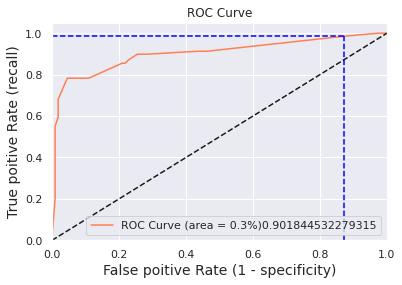

Using a threshld of 0.095 guarantees a sensitivity of 0.986 and a specificity of 0.127, i.e., a false positive rate of 87.273


In [85]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC Curve (area = 0.3%)'+ str(auc(fpr,tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False poitive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True poitive Rate (recall)', fontsize=14)

plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"Using a threshold of {round(thr[idx],3)} guarantees a sensitivity of {round(tpr[idx], 3)} and a specificity of {round(1-fpr[idx],3)}, i.e., a false positive rate of {round(np.array(fpr[idx])*100,3)}")